# Pair Programming Intro Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Buscar un conjunto de datos a analizar:

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# número de filas y columnas del dataframe

df.shape

(1338, 7)

In [4]:
# información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# No tenemos valores nulos

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Tenemos un valor duplicado

df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1337, 7)

In [10]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


Ahora miramos los outlayers:

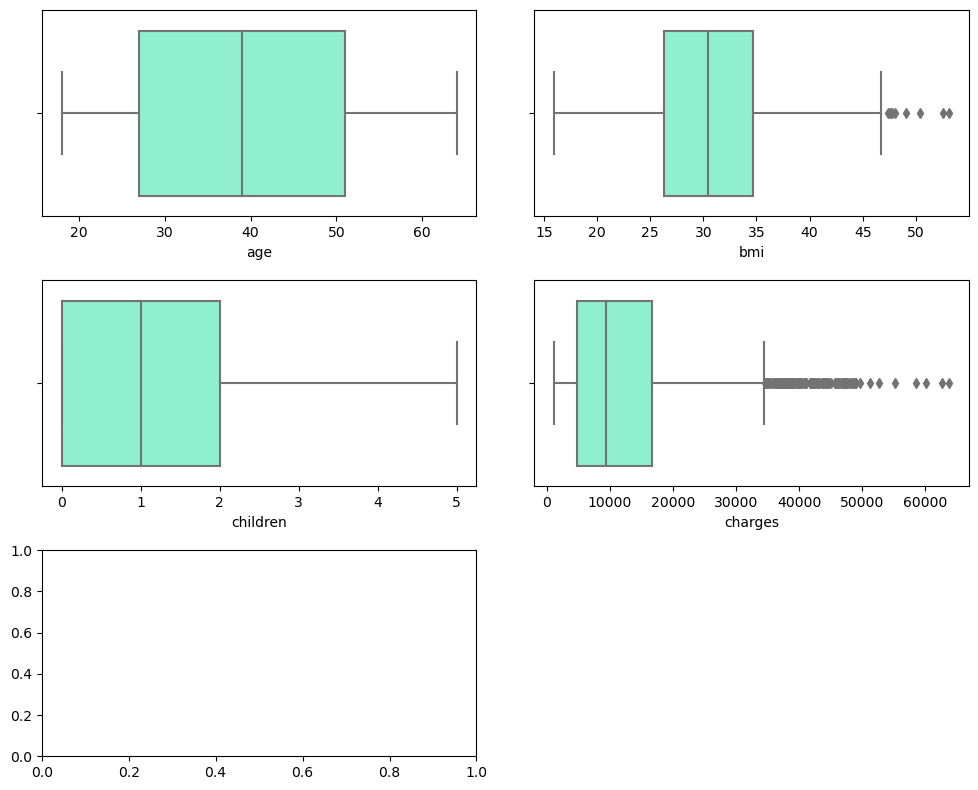

In [11]:
fig, axes = plt.subplots(3,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

## Gestión de outlayers: 

Hay muchos outlayers en la columna 'charges'. Vamos a ver si siguen algún patrón:

In [12]:
Q1 = np.percentile(df['charges'], 25)
Q1

4746.344

In [13]:
Q3 = np.percentile(df['charges'], 75)
Q3

16657.71745

In [14]:
IQR = Q3 - Q1
IQR

11911.37345

In [15]:
outlier_step = 1.5 * IQR
outlier_step

17867.060175

In [16]:
outliers_data = df[(df["charges"] < Q1 - outlier_step) | (df['charges'] > Q3 + outlier_step)]

In [17]:
outliers_data.head(10)

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
23,34,female,31.92,1,yes,northeast,37701.87680
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
38,35,male,36.67,1,yes,northeast,39774.27630
39,60,male,39.90,0,yes,southwest,48173.36100
49,36,male,35.20,1,yes,southeast,38709.17600
53,36,male,34.43,0,yes,southeast,37742.57570


In [18]:
outliers_data['smoker'].value_counts()

yes    136
no       3
Name: smoker, dtype: int64

Parece que los outlayers representan a los fumadores. Dividimos el DF entre fumadores y no fumadores para dejar los outlayers a parte.

In [19]:
df_fumadores = df[df['smoker'] != 'no']

In [20]:
df_fumadores.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [21]:
df_nofumadores = df[df['smoker'] != 'yes']

Nos quedamos solo con los no fumadores por lo que en principio no deberiamos tener tantos outliers, aun asi lo comprobamos con un boxplot.

In [22]:
df_nofumadores.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [23]:
df_numericas_nofumadores = df_nofumadores.select_dtypes(include=np.number) #Seleccionamos nuestras numéricas
df_numericas_nofumadores.head(2)

,age,bmi,children,charges
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


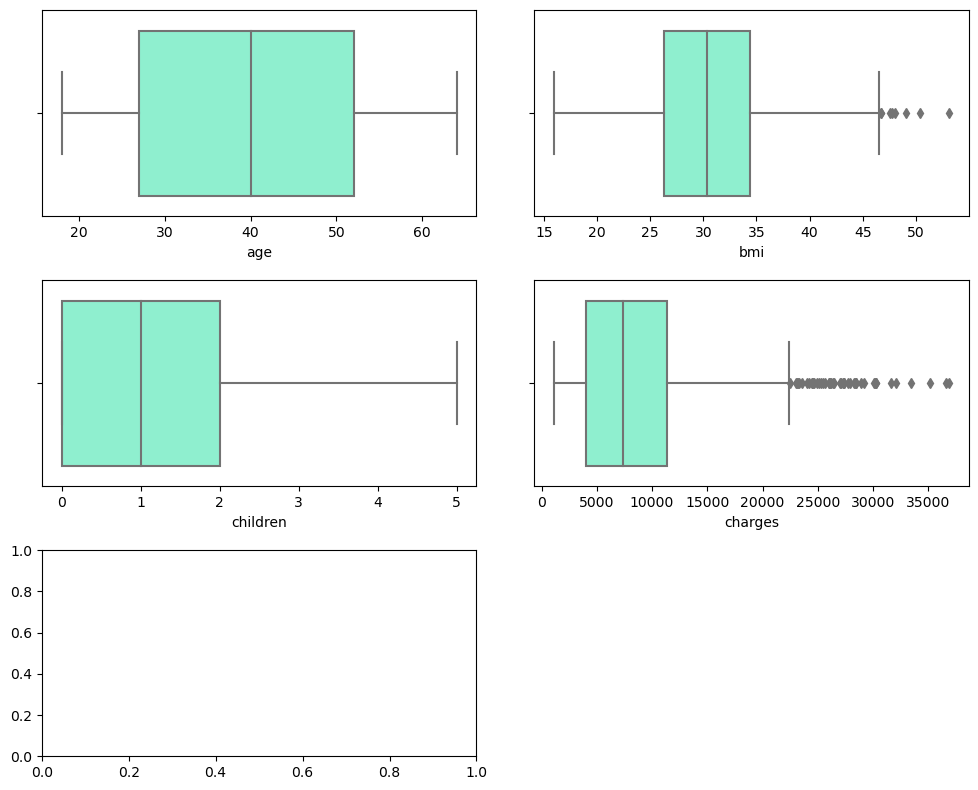

In [24]:
fig, axes = plt.subplots(3,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(df_numericas_nofumadores.columns):
    sns.boxplot(x = df_numericas_nofumadores[columna], data = df_numericas_nofumadores, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

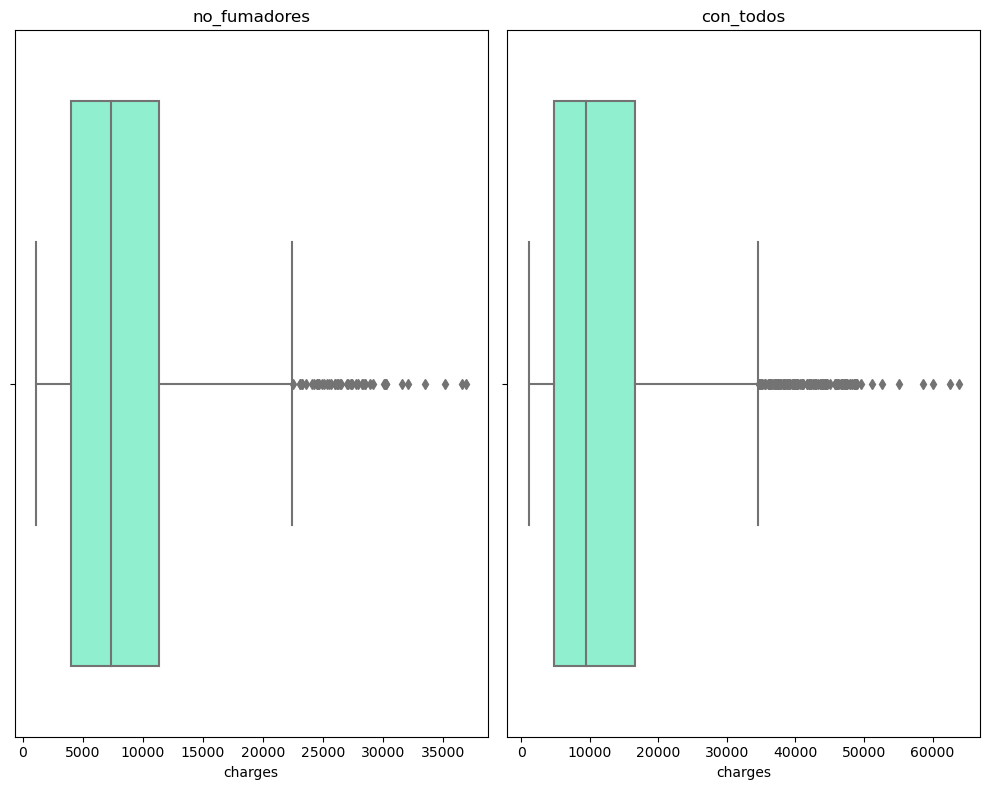

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10,8))

axes = axes.flat

sns.boxplot(x = df_numericas_nofumadores['charges'], data = df_numericas_nofumadores, ax=axes[0], color = "aquamarine"); # para trazar una línea de densidad
sns.boxplot(x = df['charges'], data = df, ax=axes[1], color = "aquamarine")
axes[0].set_title('no_fumadores', fontsize = 12)    
axes[1].set_title('con_todos', fontsize = 12)    
plt.tight_layout()
plt.show()

Vemos que el patrón no es de fumadores/no fumadores así que vamos a quitar los outliers de la columna 'charges' .

In [26]:
sin_outliers_data= df[(df['charges'] < Q3 + outlier_step)]

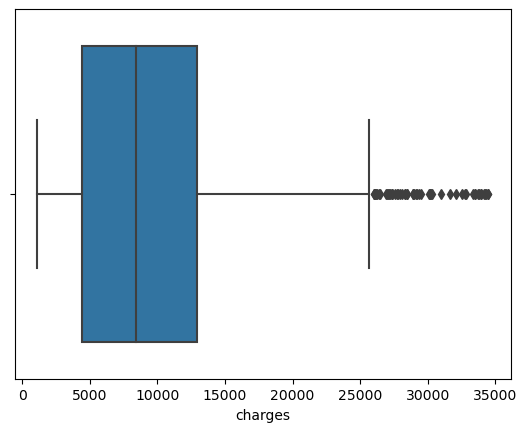

In [27]:
sns.boxplot(data=sin_outliers_data, x='charges');

Nos quedamos con esta división.

#### Primero analizamos nuestra variable respuesta:

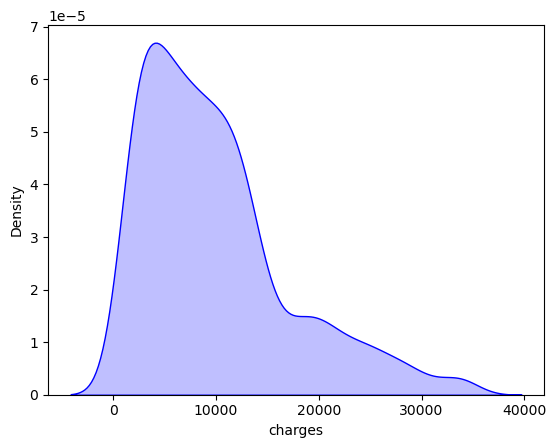

In [28]:
sns.distplot(
    sin_outliers_data["charges"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

#### Luego nuestra variables predictorias: 

In [29]:
sin_outliers_data.select_dtypes(include = np.number).describe().T


,count,mean,std,min,25%,50%,75%,max
age,1198.0,39.006678,14.062040,18.0000,26.000000,39.00000,51.0000,64.000
bmi,1198.0,30.094787,6.013044,15.9600,25.800000,29.73500,33.8200,53.130
children,1198.0,1.085142,1.214407,0.0000,0.000000,1.00000,2.0000,5.000
charges,1198.0,9934.671758,7240.216987,1121.8739,4418.591062,8411.75495,12955.3563,34472.841


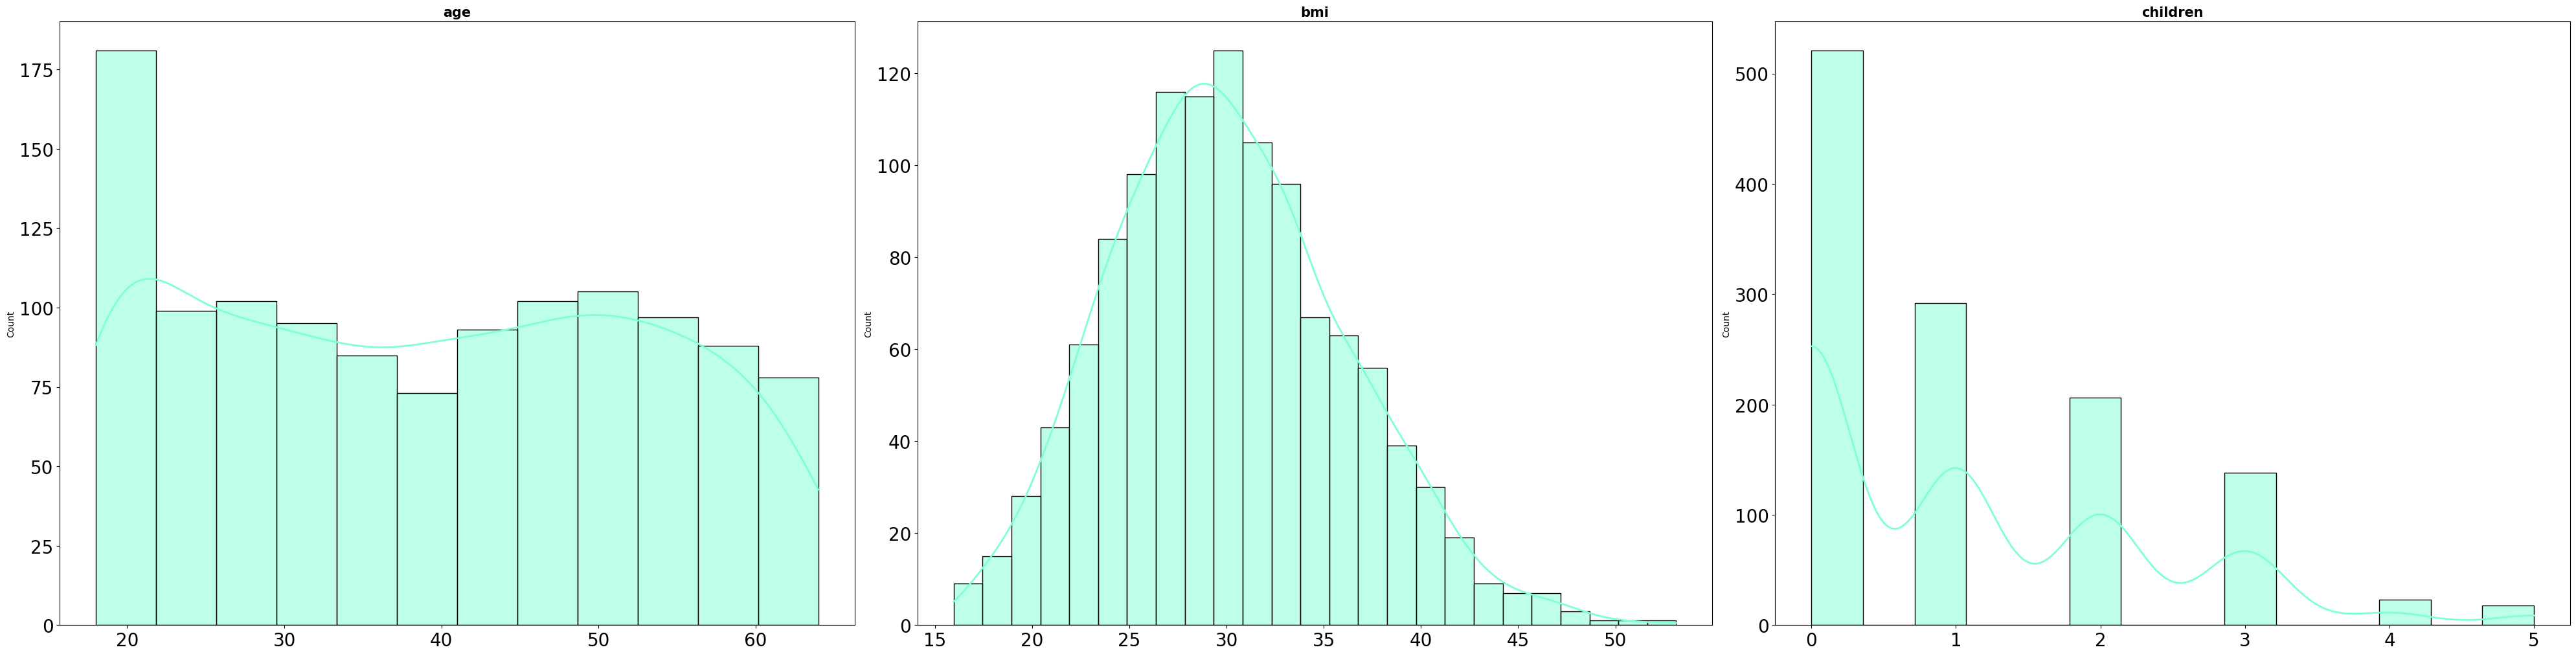

In [30]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))


axes = axes.flat

columnas_numeric = sin_outliers_data.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = sin_outliers_data,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

    


## Vamos a ver la correlación de nuestros datos:

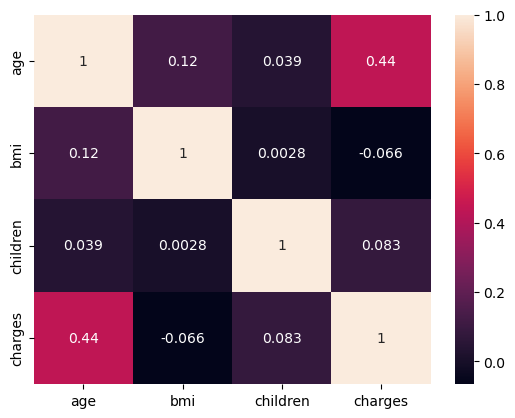

In [31]:
sns.heatmap(sin_outliers_data.corr(), annot=True);

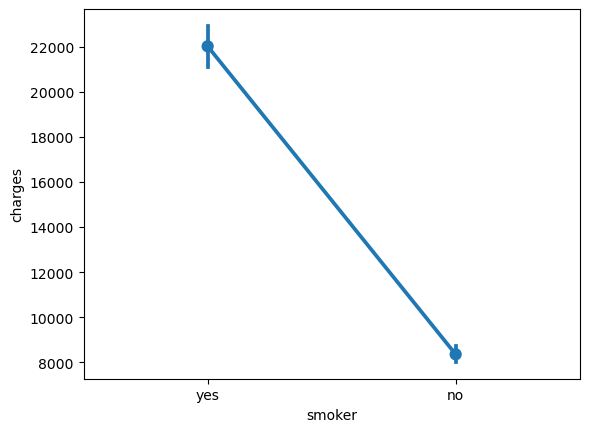

In [32]:
sns.pointplot (x='smoker', y='charges', data= sin_outliers_data);

## Guardamos nuestro CSV con los datos de los no fumadores

In [33]:
sin_outliers_data.to_csv('data/sin_outliers_data.csv')